<a href="https://colab.research.google.com/github/tainabortolette/analisesentimento/blob/main/analisedesentimento_taina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 *Esta análise de sentimento foi realizada com base em textos publicados pelos consumidores na página da marca Magazine Luiza, no Twitter. Os tweets foram extraídos pelo aplicativo*

In [2]:
import pandas as pd
import csv
from pandas import Series, DataFrame

Importando as bibliotecas e o arquivo CSV onde está os tweets

In [26]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data = pd.read_csv('/content/drive/My Drive/dataset/collect.csv' )

In [36]:
data.head().T

0  ...                                                  4
screen_name                                       diegosnantes  ...                                        __JustVic__
full_text    @magazineluiza To com 30 anos e ainda tenho me...  ...  @magazineluiza Magalu, quero comprar o Galaxy ...
created_at                      Fri Mar 19 01:31:03 +0000 2021  ...                     Fri Mar 19 01:12:41 +0000 2021

[3 rows x 5 columns]

**NLTK** é a biblioteca de processamento de linguagem natural, que consiste na base da análise de sentimento. Por meio dela, conseguiremos realizar o pré-processamento dos textos;
 
 
*O pré-processamento seguirá as seguintes etapas:*
1.   Stopwords	Remoção de palavras que não trazem carga semântica
2.   Lowercase  Para colocar todo texto em minúsculo
1.   Links 	Retirada de links https:/ das sentenças.
2.  Stemming	Redução das palavras flexionadas à raiz
1.   Pontuação	Etapa de retirar pontuação das sentenças
2.   Tokenize	Função que consiste em segmentar os textos em palavras e organizá-las em listas.








In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**STOPWORDS**  é o primeiro step. Ele removerá palavras sem carga semântica/lexical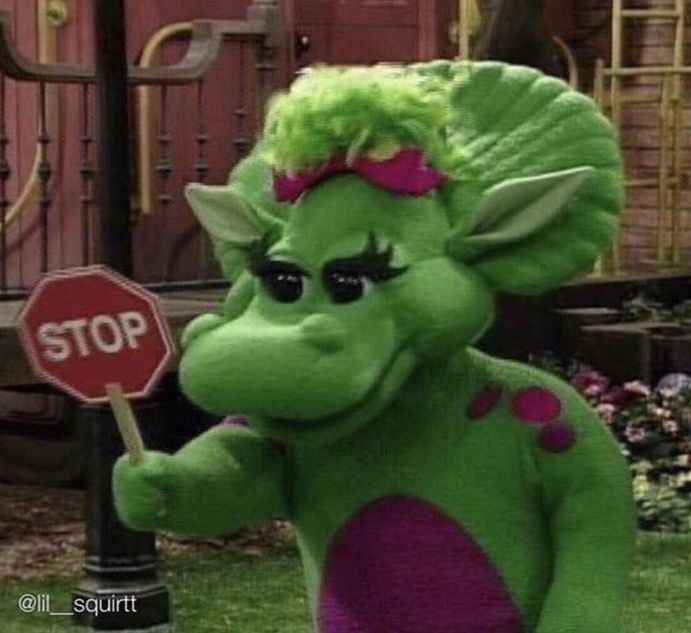

In [50]:
from nltk.corpus import stopwords

In [51]:
stop = stopwords.words('portuguese')
data['full_text'] = data['full_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [52]:
data['full_text']

0       @magazineluiza to 30 anos ainda medo palhaço k...
1                              @magazineluiza morto vivo.
2              @maceds2 @magazineluiza difícil amiga kkkk
3       @magazineluiza medo mãe descobrir colocava fog...
4       @magazineluiza magalu, quero comprar galaxy a2...
                              ...                        
4208    @magazineluiza cheio montes, posso mar mergulh...
4209    @magazineluiza onde existe cidade chamam carib...
4210                      @magazineluiza pontinha, amo...
4211    @magazineluiza entrei adianta nada, vou procon...
4212    @magazineluiza estado bastante acarajé praias ...
Name: full_text, Length: 4213, dtype: object

Agora, o **lowercase**

In [42]:
data['full_text'] = data['full_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [43]:
data['full_text']

0       @magazineluiza to com 30 anos e ainda tenho me...
1                              @magazineluiza morto vivo.
2              @maceds2 @magazineluiza difícil amiga kkkk
3       @magazineluiza eu só tinha medo da minha mãe d...
4       @magazineluiza magalu, quero comprar o galaxy ...
                              ...                        
4208    @magazineluiza é cheio de montes, não posso no...
4209    @magazineluiza onde existe uma cidade que cham...
4210                      @magazineluiza pontinha, amo...
4211    @magazineluiza eu entrei e não adianta de nada...
4212    @magazineluiza no meu estado tem bastante acar...
Name: full_text, Length: 4213, dtype: object

 Agora, importando a biblioteca e realizando o **Stemming**

In [53]:
from nltk.stem import PorterStemmer

In [54]:
st = PorterStemmer()

In [55]:
def Stemming(data):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in data.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [56]:
data['full_text']

0       @magazineluiza to 30 anos ainda medo palhaço k...
1                              @magazineluiza morto vivo.
2              @maceds2 @magazineluiza difícil amiga kkkk
3       @magazineluiza medo mãe descobrir colocava fog...
4       @magazineluiza magalu, quero comprar galaxy a2...
                              ...                        
4208    @magazineluiza cheio montes, posso mar mergulh...
4209    @magazineluiza onde existe cidade chamam carib...
4210                      @magazineluiza pontinha, amo...
4211    @magazineluiza entrei adianta nada, vou procon...
4212    @magazineluiza estado bastante acarajé praias ...
Name: full_text, Length: 4213, dtype: object

Para deixar os textos ainda mais organizados e limpos, vamos remover os link *https*. Para isso, precisamos importar a biblioteca ***re*** 

In [58]:
import re

In [59]:
#função para remover os https de DF
def limpeza_dados(data):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    data = re.sub(r"http\S+", "", data).replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (data)

In [60]:
data['full_text']

0       @magazineluiza to 30 anos ainda medo palhaço k...
1                              @magazineluiza morto vivo.
2              @maceds2 @magazineluiza difícil amiga kkkk
3       @magazineluiza medo mãe descobrir colocava fog...
4       @magazineluiza magalu, quero comprar galaxy a2...
                              ...                        
4208    @magazineluiza cheio montes, posso mar mergulh...
4209    @magazineluiza onde existe cidade chamam carib...
4210                      @magazineluiza pontinha, amo...
4211    @magazineluiza entrei adianta nada, vou procon...
4212    @magazineluiza estado bastante acarajé praias ...
Name: full_text, Length: 4213, dtype: object

In [61]:
#removendo as pontuações dos textos
data['full_text'] = data['full_text'].str.replace(r'[^\w\s]', "")

Chegou a hora do **Tokenizer**

In [62]:
#importanto as blibliotecas para aplicar Tokenizer em Tweets(esta biblioteca é específica)
from nltk.tokenize import TweetTokenizer

In [63]:
from nltk.tokenize import word_tokenize

In [64]:
tt = TweetTokenizer()

In [65]:
data['full_text'].apply(tt.tokenize)

0       [magazineluiza, to, 30, anos, ainda, medo, pal...
1                            [magazineluiza, morto, vivo]
2        [maceds, 2, magazineluiza, difícil, amiga, kkkk]
3       [magazineluiza, medo, mãe, descobrir, colocava...
4       [magazineluiza, magalu, quero, comprar, galaxy...
                              ...                        
4208    [magazineluiza, cheio, montes, posso, mar, mer...
4209    [magazineluiza, onde, existe, cidade, chamam, ...
4210                       [magazineluiza, pontinha, amo]
4211    [magazineluiza, entrei, adianta, nada, vou, pr...
4212    [magazineluiza, estado, bastante, acarajé, pra...
Name: full_text, Length: 4213, dtype: object

Como no final será feito um treinamento com *IAs*, eu também optei por remover o nome da empresa nos tweets. Afinal, isso não será necessário para classificar os sentimentos presentes nos sintagmas. 

In [66]:
#removendo a palavra Magazine Luiza

data['full_text'] = data['full_text'].str.replace(r"magazineluiza", "")

In [67]:
data['full_text']

0                  to 30 anos ainda medo palhaço kkkkkkkk
1                                              morto vivo
2                             maceds2  difícil amiga kkkk
3        medo mãe descobrir colocava fogo coisas escon...
4        magalu quero comprar galaxy a21s azul samsung...
                              ...                        
4208     cheio montes posso mar mergulhar hospitalidad...
4209     onde existe cidade chamam caribe brasileiro a...
4210                                         pontinha amo
4211     entrei adianta nada vou procon procurar direitos
4212     estado bastante acarajé praias lindas povo ac...
Name: full_text, Length: 4213, dtype: object

 Casa limpa, chegou a hora de aplicar conceitos de **NPL**
 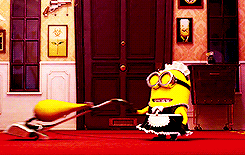

Uma das abordabens que optei por trabalhar foi com a lexical, que consiste em inserir um dicionário de palavras com cargas previamente demarcadas e aplicá-las ao nosso DF. Para isso, escolhi o **Sentilex-PT** 

In [70]:
sentilexpt = open("/content/drive/My Drive/dataset/SentiLex-PT02/SentiLex-lem-PT02.txt",'r')

In [71]:
print(sentilexpt)

<_io.TextIOWrapper name='/content/drive/My Drive/dataset/SentiLex-PT02/SentiLex-lem-PT02.txt' mode='r' encoding='UTF-8'>


In [72]:
#dicionário vazio para inserirmos os vocábulos com cargas lexicais nele para, posteriormente, aplicarmos à massa de dados
dic_palavra_polaridade = {}

In [73]:

for i in sentilexpt.readlines():
    pos_ponto = i.find('.')
    palavra = (i[:pos_ponto])
    pol_pos = i.find('POL')
    polaridade = (i[pol_pos + 7:pol_pos+9]).replace(';', '')
    dic_palavra_polaridade[palavra] = polaridade

In [74]:
dic_palavra_polaridade

{'à-vontade': '1',
 'abafado': '-1',
 'abafante': '-1',
 'abaixado': '-1',
 'abalado': '-1',
 'abalizado': '1',
 'abalroado': '-1',
 'abalroar': '1',
 'abanar': '1',
 'abandalhado': '-1',
 'abandalhamento': '-1',
 'abandonado': '-1',
 'abandonar': '-1',
 'abarcante': '0',
 'abarrotado': '-1',
 'abastado': '1',
 'abastecido': '0',
 'abater': '1',
 'abatido': '-1',
 'abelhudo': '-1',
 'abençoado': '1',
 'aberração': '-1',
 'aberrante': '-1',
 'aberrativo': '-1',
 'aberto': '1',
 'abespinhado': '-1',
 'abestalhado': '-1',
 'abilolado': '-1',
 'abjeção': '-1',
 'abjecção': '-1',
 'abjecto': '-1',
 'abjeto': '-1',
 'abnegado': '1',
 'abobado': '-1',
 'abobalhado': '-1',
 'abolicionista': '0',
 'abolido': '-1',
 'abominador': '-1',
 'abominando': '-1',
 'abominar': '0',
 'abominável': '-1',
 'abonado': '1',
 'abonatório': '1',
 'abonecado': '0',
 'aborrecer-se': '-1',
 'aborrecer': '1',
 'aborrecido': '-1',
 'abortado': '-1',
 'abraçado': '1',
 'abrasileirado': '0',
 'abrigado': '0',
 'abril

In [75]:
#função para aplicar o score de cada vocábulo aos tweets
def score_sentimento(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = sum(l_sentimento)
    if score > 0:
        return 'Pos {} '.format(score)
    elif score == 0:
        return 'Neu {} '.format(score)
    else:
        
        return 'Neg {}'.format(score)

In [76]:
data['sentimento'] = data.apply(lambda row: score_sentimento(row['full_text']), axis ='columns')

Prontinho! tudo aplicado, agora chegou a hora de avaliar a **polarização**

In [77]:
#Reorganizando o resultado em colunas para posteriormente lançar no modelo
data['score_sentimento'] = data['sentimento'].str.slice(-2)
data['score_sentimento'] = data['score_sentimento'].astype(int)
data['created_at'] = data['sentimento'].str.slice(0,-3)


In [78]:
#avaliando as classes e como ficaram organizadas 
data.groupby('score_sentimento').count()

screen_name  full_text  created_at  sentimento
score_sentimento                                                
-7                          1          1           1           1
-5                          1          1           1           1
-4                          2          2           2           2
-3                         26         26          26          26
-2                        121        121         121         121
-1                        587        587         587         587
 0                       2793       2793        2793        2793
 1                        577        577         577         577
 2                         85         85          85          85
 3                         17         17          17          17
 4                          3          3           3           3

In [79]:
#aplicando a função describe para avaliar os dados após o pré-processamento
print(data.describe())

       score_sentimento
count       4213.000000
mean          -0.027771
std            0.774375
min           -7.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            4.000000


Como podemos avaliar, temos todos os textos corretamente polarizados. 

Agora, chegou a hora de analisar toda a massa de dados e explorar a informação presente nela.

In [80]:
#importando as libraries necessárias para o wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl

from nltk.probability import FreqDist


In [86]:
#aplicando
stopwords = set(STOPWORDS)

In [87]:
#stopwords que serão removidas da wordcloud, pois não trazem relevância à análise
stopwords.update(["pra", "app", "aplicativo", "bom dia", "lolaescreva", "forasarahbolsominion", "vc", "vcs", "pra", "to", "os", "amo", "magazineluiza", "magalu", "magazine luiza", "maga lu" "vcs", "nao", "pq", "mim", "ai", "ta", "ja", "ter", "fazer", "lá", "deu", "dado", "então", "vou", "vai", "veze", "ficar", "tá", "apena"])

In [88]:
content = data['full_text']

In [89]:
all_content = "".join(c for c in content)

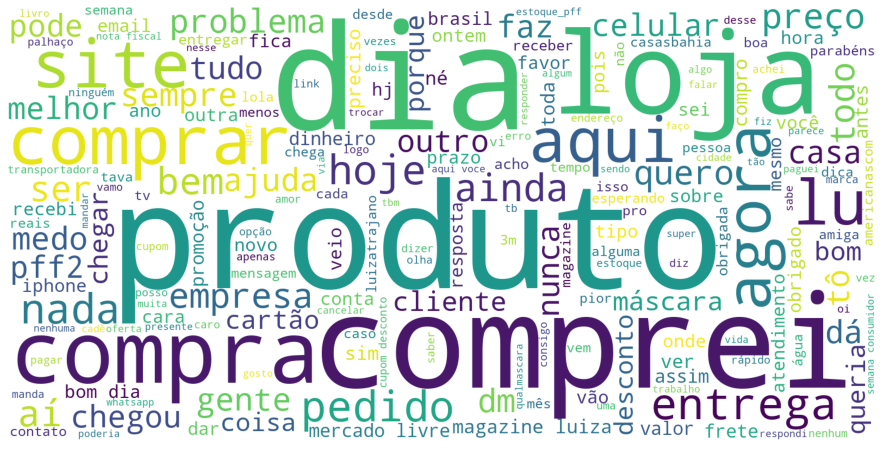

In [90]:
#criando um nuvem com todos os textos, sem classificação
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='white', width=1600,                            
                      
                      height=800).generate(all_content)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

Agora, vamos avaliar as nuvens **polarizadas**( Negativas, positivas e neutras)

In [92]:

data1 = data[['full_text','sentimento','score_sentimento']]

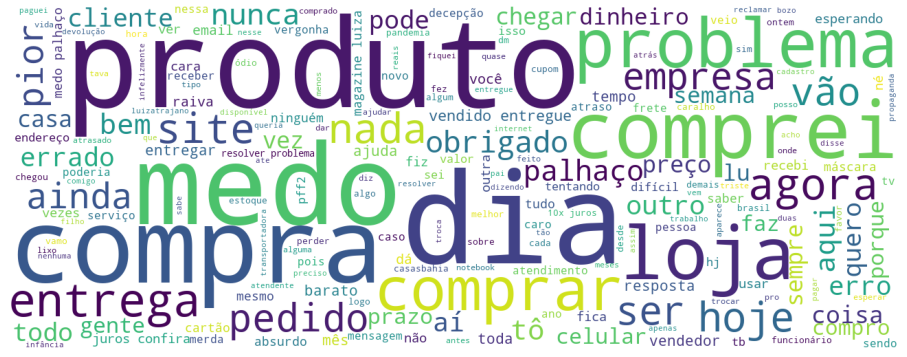

In [93]:
#wordcloud de negativos
Negative = data1[data1.score_sentimento < 0]
Neg_Content = Negative['full_text']
all_neg_content = "".join(c for c in Neg_Content)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1300,                            
                      height=500).generate(all_neg_content)
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

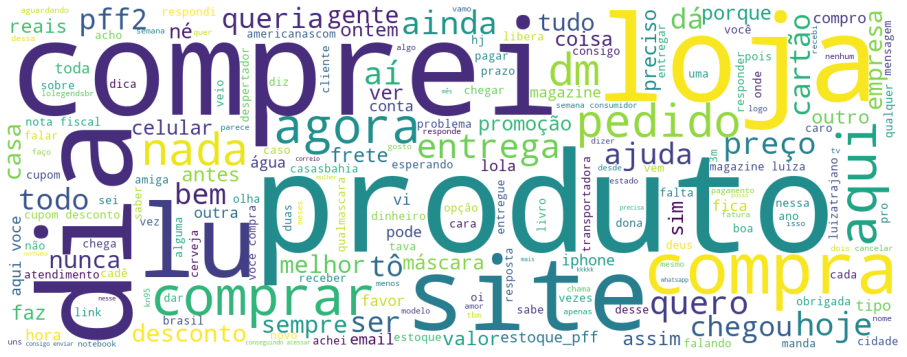

In [94]:
#wordcloud de neutros

Neutral = data1[data1.score_sentimento==0]
Neu_Content = Neutral['full_text']
all_neu_content = "".join(c for c in Neu_Content)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1300,                            
                      height=500).generate(all_neu_content)


fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

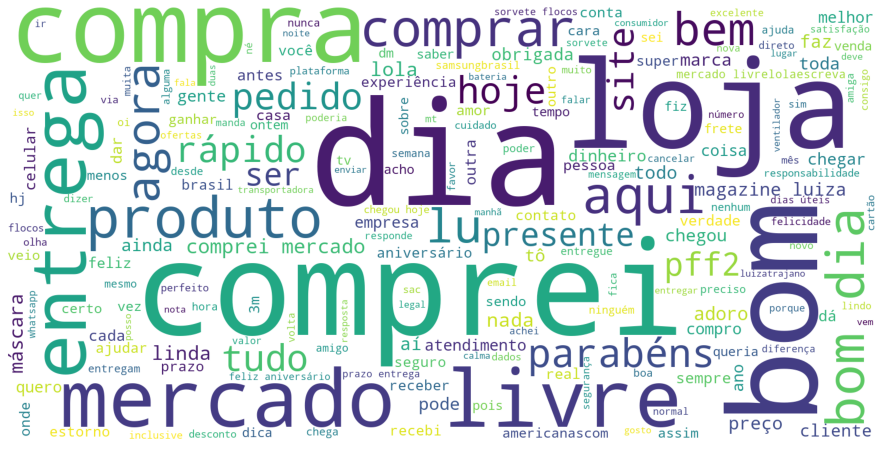

In [95]:
#wordcloud de positivos

Positive = data1[data1.score_sentimento > 0]
Pos_Content = Positive['full_text']
all_pos_content = "".join(c for c in Pos_Content)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1600,                            
                      height=800).generate(all_pos_content)


fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

*Se avaliarmos as três classes, notamos que as nuvens têm relação com os serviços de entrega prestados pela instituição.*  *As palavras mais encontradas são: produto, comprei, dia, loja, comprar e entrega. Demonstrando que os consumidores utilizam o aplicativo como fonte de feedbacks.*

In [96]:
#agora, vamos vetorizar tudo isso para aplicarmos à IA
import sklearn

**Nota importante** a IA não lê texto, por isso precisamos vetorizar todos os sintagmas e transformá-los em números legíveis para a máquina. 

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
vectorizer = CountVectorizer(max_features=1000)                


In [111]:
data_features = vectorizer.fit_transform(data['full_text'])

In [112]:
data_features = data_features.toarray()    

In [113]:
labels = data['sentimento'].values

In [114]:
# Split data into training and testing set.


from sklearn.model_selection import train_test_split


In [115]:
#passando os parâmetros de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.5, random_state=42)

In [116]:
#Usando Random Forest para classificar os reviews.
# Também calculando o Score Cross Validated.


import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [117]:
#modelo de floresta aleatória
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)


forest = forest.fit(X_train, y_train)

In [118]:
y_predict = forest.predict(X_train)

In [130]:
print(forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [119]:
#avaliando a acurácia
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7785401492722135


In [120]:
result = forest.predict(X_test)


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [122]:
#criando  métricas e matriz de confusão com random forest
sns.set("poster")
sns.set_style('whitegrid')
conf_mat = confusion_matrix(y_test, result)

In [123]:
conf_mat = confusion_matrix(y_test, result)

In [124]:
print(conf_mat)


[[ 164    4    0    0    0  136    7    0    0    0]
 [  37    7    0    0    0    9    2    0    0    0]
 [   5    6    0    0    0    3    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0]
 [  76    0    0    0    0 1260   35    0    0    0]
 [   8    1    0    0    0  120  165    8    0    0]
 [   0    0    0    0    0   11   31    0    0    0]
 [   1    0    0    0    0    1    6    1    0    0]
 [   0    0    0    0    0    1    0    0    0    0]]


Avaliando Logistica de Regressão 

In [125]:
#criando  métricas e matriz de confusão com regressão 
from sklearn.linear_model import LogisticRegression

In [126]:
LogReg = LogisticRegression(max_iter = 1000)

In [127]:
LogReg = LogReg.fit(X_train, y_train)


In [128]:
print(LogReg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [129]:
#acurácia do modelo
print(np.mean(cross_val_score(LogReg, data_features, labels, cv=10)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.7531469869752676


In [131]:
result_logreg = LogReg.predict(X_test)
conf_mat = confusion_matrix(y_test, result_logreg)


In [132]:
cmap = sns.diverging_palette(220, 50, as_cmap = True)

In [133]:
#matriz de confusão
print(conf_mat)

[[ 101    6    0    0    0  198    5    1    0    0]
 [  24    7    0    0    0   23    1    0    0    0]
 [  11    1    0    0    0    2    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0]
 [  39    5    0    0    0 1294   33    0    0    0]
 [  15    1    0    0    0  160  125    0    1    0]
 [   1    0    0    0    0   10   31    0    0    0]
 [   1    0    0    0    0    4    4    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0]]


In [137]:
import matplotlib.pyplot as plt
import matplotlib

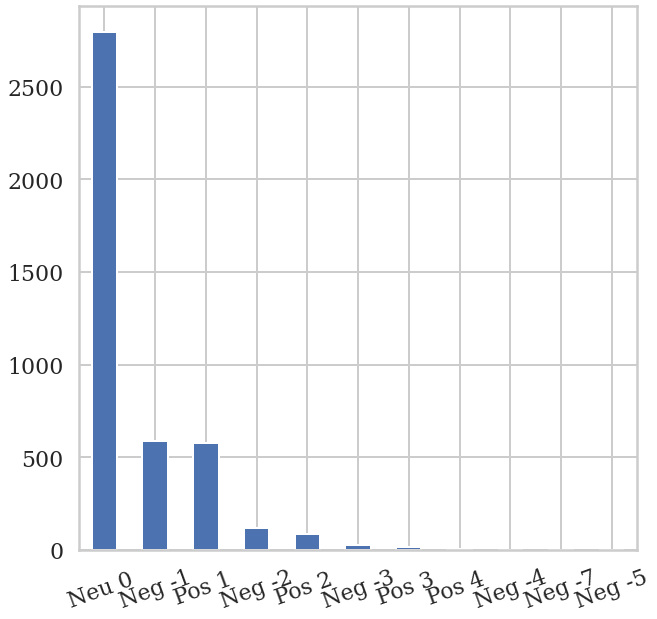

In [147]:
#este gráfico nos mostra as classes polarizadas
data['sentimento'].value_counts().plot.bar(rot=20)


**Avaliando todas as classes dos textos polarizados, conseguimos identificar que há, de -7 negativos até neutros. Esta última é bem maior do que as positivas e negativas.Portanto, os clientes predominantemente têm uma opinião neutra sobre a marca**

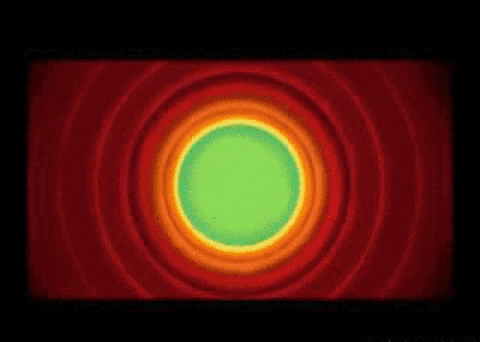

```
```

. 